In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [3]:
df=pd.read_csv(r"C:\Users\AnnamalaiG\Downloads\DS1_C5_S5_Hotel Dataset.csv")

In [4]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,NaN,0,Transient,132.53,0,2,Check-Out,29-08-2017
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,NaN,0,Transient,147.68,0,0,Check-Out,01-09-2017
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,NaN,0,Transient,80.10,0,1,Check-Out,01-09-2017
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,1,Check-Out,03-09-2017


In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

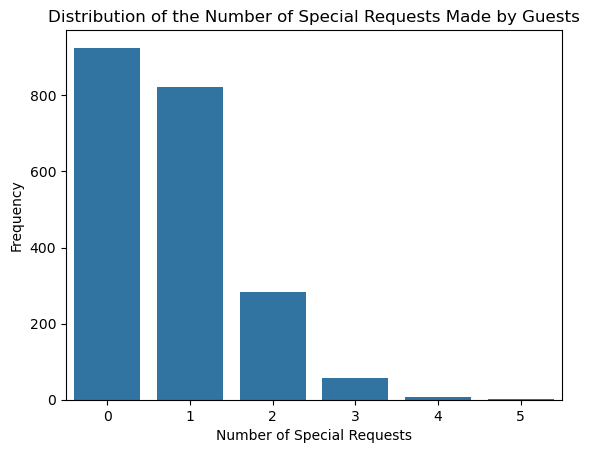

In [12]:
# Task 1
# Counting the number of special requests
special_requests_distribution = df['total_of_special_requests'].value_counts().reset_index()
special_requests_distribution.columns = ['Number of Special Requests', 'Frequency']

sb.barplot(x='Number of Special Requests', y='Frequency', data=special_requests_distribution)
plt.title('Distribution of the Number of Special Requests Made by Guests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Frequency')
plt.show()

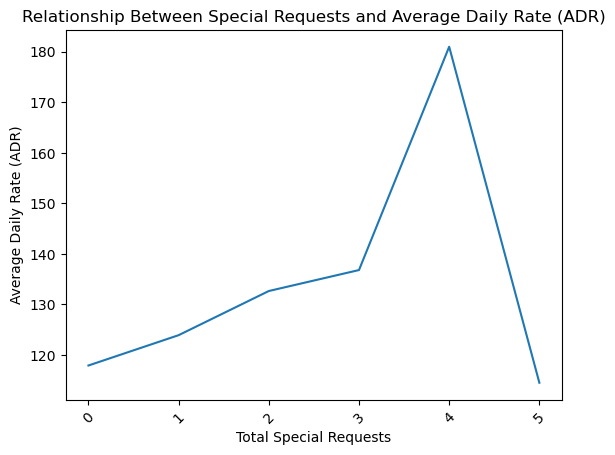

In [14]:
# Analyzing the relationship between special requests and ADR
special_requests_adr = df.groupby('total_of_special_requests').agg({
    'adr': 'mean',  # Average Daily Rate
}).reset_index()

# Plotting the relationship between special requests and ADR
sb.lineplot(x='total_of_special_requests', y='adr', data=special_requests_adr)
plt.title('Relationship Between Special Requests and Average Daily Rate (ADR)')
plt.xlabel('Total Special Requests')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.show()

In [60]:
# Analyzing ADR and special requests by room type
room_type_analysis = df.groupby('reserved_room_type').agg({
    'adr': 'mean',
    'total_of_special_requests': 'mean'
}).reset_index()
print(room_type_analysis)

  reserved_room_type         adr  total_of_special_requests
0                  A  102.282482                   0.720098
1                  B  104.705000                   1.033333
2                  C  172.684348                   1.173913
3                  D  134.109882                   0.912941
4                  E  154.054940                   0.722892
5                  F  177.835714                   0.607143
6                  G  198.491735                   0.775510
7                  H  225.505714                   0.642857


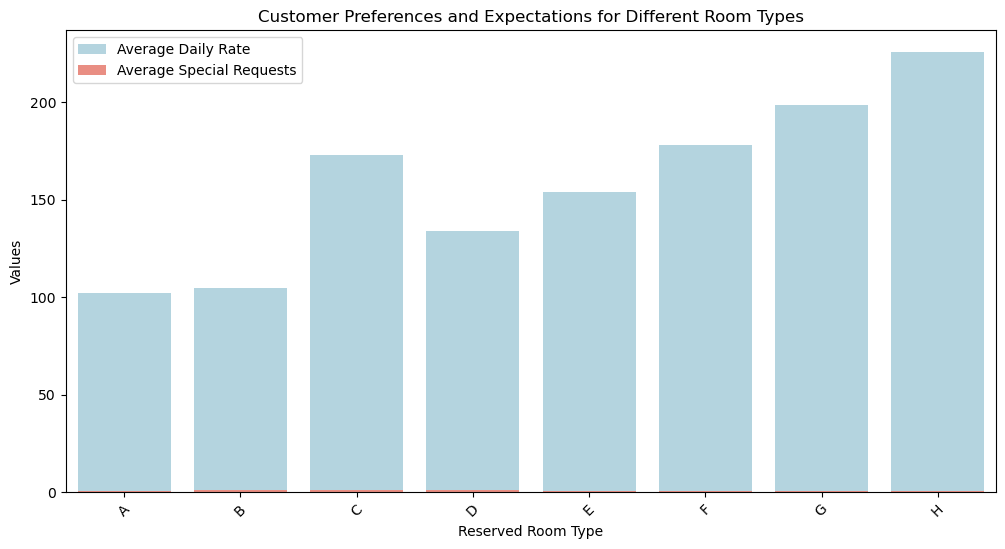

In [18]:
# Plotting ADR and special requests by room type
plt.figure(figsize=(12, 6))
sb.barplot(x='reserved_room_type', y='adr', data=room_type_analysis, color='lightblue', label='Average Daily Rate')
sb.barplot(x='reserved_room_type', y='total_of_special_requests', data=room_type_analysis, color='salmon', label='Average Special Requests')
plt.title('Customer Preferences and Expectations for Different Room Types')
plt.xlabel('Reserved Room Type')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [24]:
# Task 2
successful_bookings = df[df['is_canceled'] == 0]
channel_segment_analysis = successful_bookings.groupby(['distribution_channel', 'market_segment']).size().reset_index(name='successful_bookings')
channel_segment_analysis = channel_segment_analysis.sort_values(by='successful_bookings', ascending=False)

print(channel_segment_analysis)

   distribution_channel market_segment  successful_bookings
12                TA/TO      Online TA                  973
5                Direct         Direct                  303
11                TA/TO  Offline TA/TO                  136
10                TA/TO         Groups                  129
1             Corporate      Corporate                   29
8                   GDS      Online TA                    6
9                 TA/TO         Direct                    6
6                Direct      Online TA                    4
2             Corporate         Groups                    3
7                   GDS  Offline TA/TO                    3
3             Corporate  Offline TA/TO                    2
0             Corporate       Aviation                    1
4                Direct  Complementary                    1


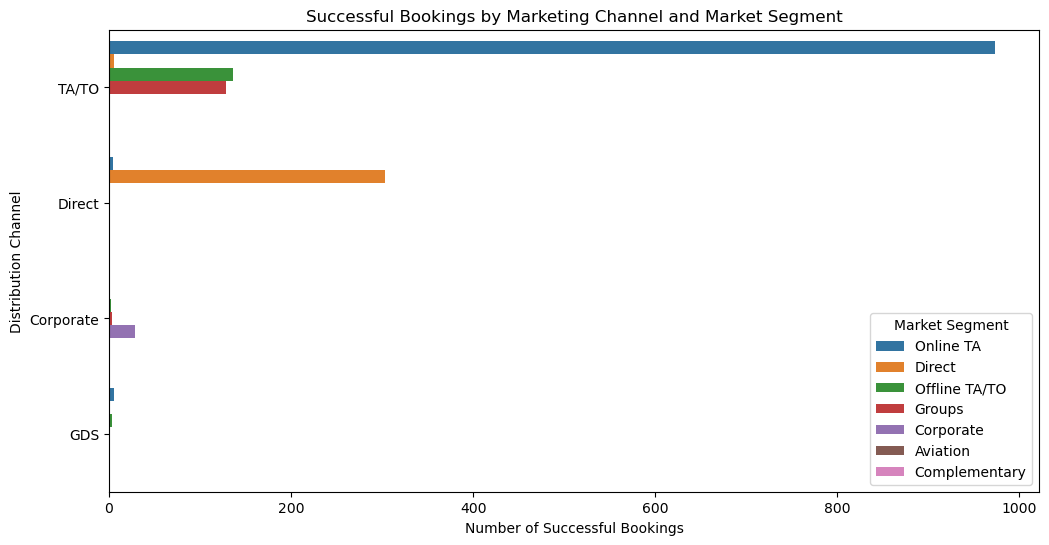

In [28]:
# Plotting successful bookings by marketing channel and segment
plt.figure(figsize=(12, 6))
sb.barplot(x='successful_bookings', y='distribution_channel', hue='market_segment', data=channel_segment_analysis)
plt.title('Successful Bookings by Marketing Channel and Market Segment')
plt.xlabel('Number of Successful Bookings')
plt.ylabel('Distribution Channel')
plt.legend(title='Market Segment')
plt.show()

In [48]:
# Group by available columns related to possible amenities and calculate mean ADR
amenities_analysis = successful_bookings.groupby(['required_car_parking_spaces', 'total_of_special_requests']).agg({
    'adr': 'mean'
}).reset_index()

print(amenities_analysis)

   required_car_parking_spaces  total_of_special_requests         adr
0                            0                          0  107.024278
1                            0                          1  119.722885
2                            0                          2  128.473505
3                            0                          3  138.455000
4                            0                          4  180.951250
5                            0                          5  114.500000
6                            1                          0  131.927903
7                            1                          1  140.676379
8                            1                          2  156.411500
9                            1                          3  192.250000


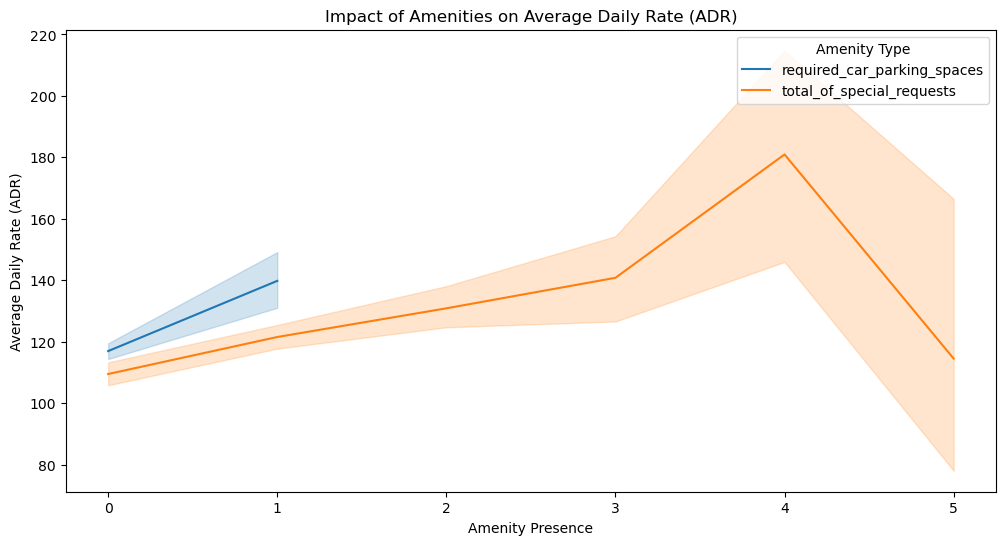

In [58]:
amenities_columns = ['required_car_parking_spaces', 'total_of_special_requests']
plt.figure(figsize=(12, 6))
for amenity in amenities_columns:
    sb.lineplot(x=amenity, y='adr', data=successful_bookings, label=amenity)
plt.title('Impact of Amenities on Average Daily Rate (ADR)')
plt.xlabel('Amenity Presence')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend(title="Amenity Type")
plt.show()

In [38]:
# Analyzing total bookings by distribution channel
booking_distribution = df['distribution_channel'].value_counts().reset_index()
booking_distribution.columns = ['Distribution Channel', 'Total Bookings']

print(booking_distribution)


  Distribution Channel  Total Bookings
0                TA/TO            1689
1               Direct             351
2            Corporate              35
3                  GDS              22


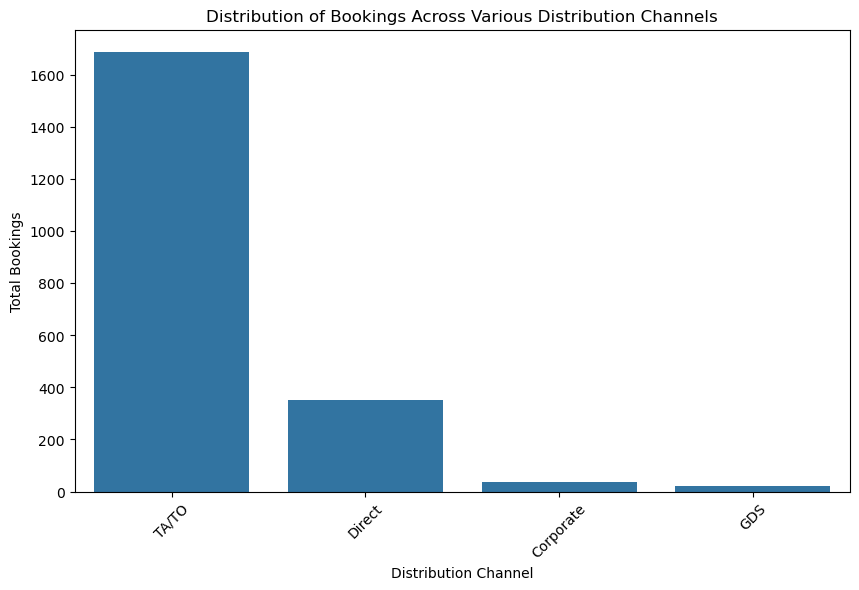

In [40]:
# Plotting the distribution of bookings across distribution channels
plt.figure(figsize=(10, 6))
sb.barplot(x='Distribution Channel', y='Total Bookings', data=booking_distribution)
plt.title('Distribution of Bookings Across Various Distribution Channels')
plt.xlabel('Distribution Channel')
plt.ylabel('Total Bookings')
plt.xticks(rotation=45)
plt.show()
